# Data Understanding

## Pengumpulan data

In [30]:
!pip install ucimlrepo
!pip install tabulate
!pip install scikit-learn
!pip install scikit-learn ucimlrepo tabulate

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878)

# data (as pandas dataframes)
X = cirrhosis_patient_survival_prediction.data.features
y = cirrhosis_patient_survival_prediction.data.targets

# metadata
print(cirrhosis_patient_survival_prediction.metadata)

# variable information
print(cirrhosis_patient_survival_prediction.variables)


{'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'ID': 296, 'type'

## Visualisasi data

In [4]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from tabulate import tabulate

# Mengambil dataset
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878)

# Fitur dan target
X = cirrhosis_patient_survival_prediction.data.features
y = cirrhosis_patient_survival_prediction.data.targets

# Gabungkan menjadi satu DataFrame
data = pd.concat([X, y], axis=1)

# Tambahkan kolom ID
data.insert(0, 'id', range(1, len(data) + 1))

# Ambil 5 data teratas dan terbawah
top_5 = data.head()
bottom_5 = data.tail()

# Gabungkan keduanya
combined = pd.concat([top_5, bottom_5])

# Tampilkan sebagai tabel
print(tabulate(combined, headers='keys', tablefmt='grid', showindex=False))


+------+-----------------+-------+-------+-----------+----------------+-----------+---------+-------------+---------------+-----------+----------+------------+--------+-----------------+-------------+---------------+---------+----------+
|   id | Drug            |   Age | Sex   | Ascites   | Hepatomegaly   | Spiders   | Edema   |   Bilirubin |   Cholesterol |   Albumin |   Copper |   Alk_Phos |   SGOT |   Tryglicerides |   Platelets |   Prothrombin |   Stage | Status   |
+======+=================+=======+=======+===========+================+===========+=========+=============+===============+===========+==========+============+========+=================+=============+===============+=========+==========+
|    1 | D-penicillamine | 21464 | F     | Y         | Y              | Y         | Y       |        14.5 |           261 |      2.6  |      156 |     1718   | 137.95 |             172 |         190 |          12.2 |       4 | D        |
+------+-----------------+-------+-------+------

In [8]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Ambil dataset
data = fetch_ucirepo(id=878).data
df = pd.concat([data.features, data.targets], axis=1)

# Konversi kolom numerik yang salah tipe (object) ke float
cols_to_convert = ['Cholesterol', 'Copper', 'Tryglicerides', 'Platelets']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # ubah menjadi NaN jika gagal

# Tampilkan statistik deskriptif untuk kolom numerik
print("=== Statistik Deskriptif: Kolom Numerik ===")
print(df.describe())

# Tampilkan statistik deskriptif untuk kolom kategorikal
print("\n=== Statistik Deskriptif: Kolom Kategorikal ===")
print(df.describe(include='object'))


=== Statistik Deskriptif: Kolom Numerik ===
                Age   Bilirubin  Cholesterol     Albumin      Copper  \
count    418.000000  418.000000   284.000000  418.000000  310.000000   
mean   18533.351675    3.220813   369.510563    3.497440   97.648387   
std     3815.845055    4.407506   231.944545    0.424972   85.613920   
min     9598.000000    0.300000   120.000000    1.960000    4.000000   
25%    15644.500000    0.800000   249.500000    3.242500   41.250000   
50%    18628.000000    1.400000   309.500000    3.530000   73.000000   
75%    21272.500000    3.400000   400.000000    3.770000  123.000000   
max    28650.000000   28.000000  1775.000000    4.640000  588.000000   

           Alk_Phos        SGOT  Tryglicerides   Platelets  Prothrombin  \
count    312.000000  312.000000     282.000000  407.000000   416.000000   
mean    1982.655769  122.556346     124.702128  257.024570    10.731731   
std     2140.388824   56.699525      65.148639   98.325585     1.022000   
min    

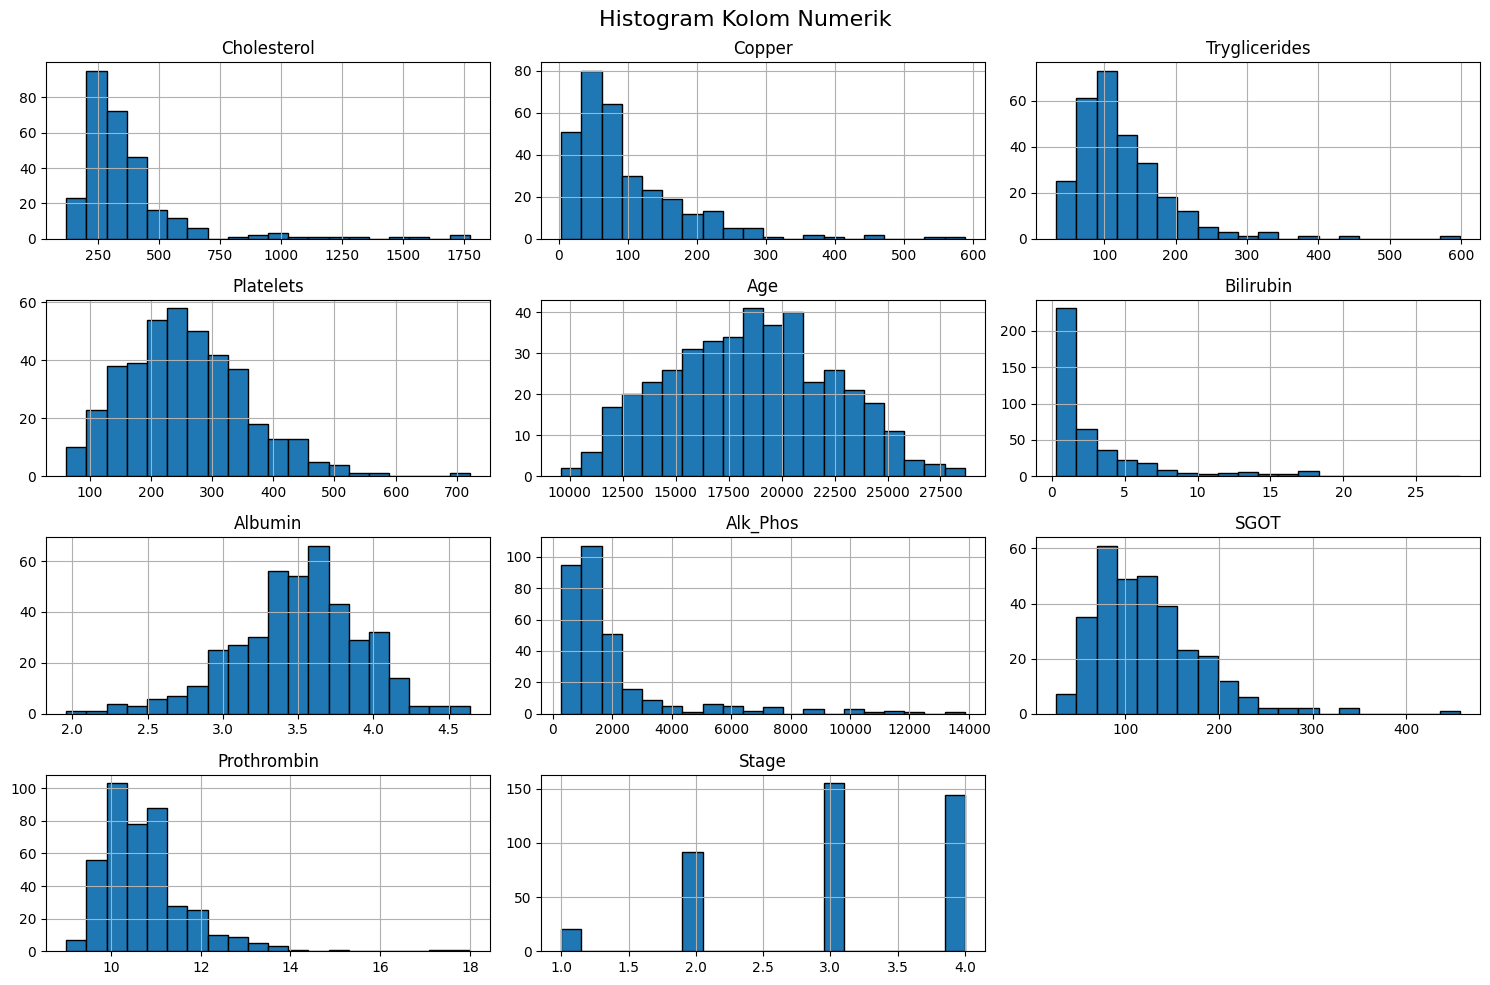

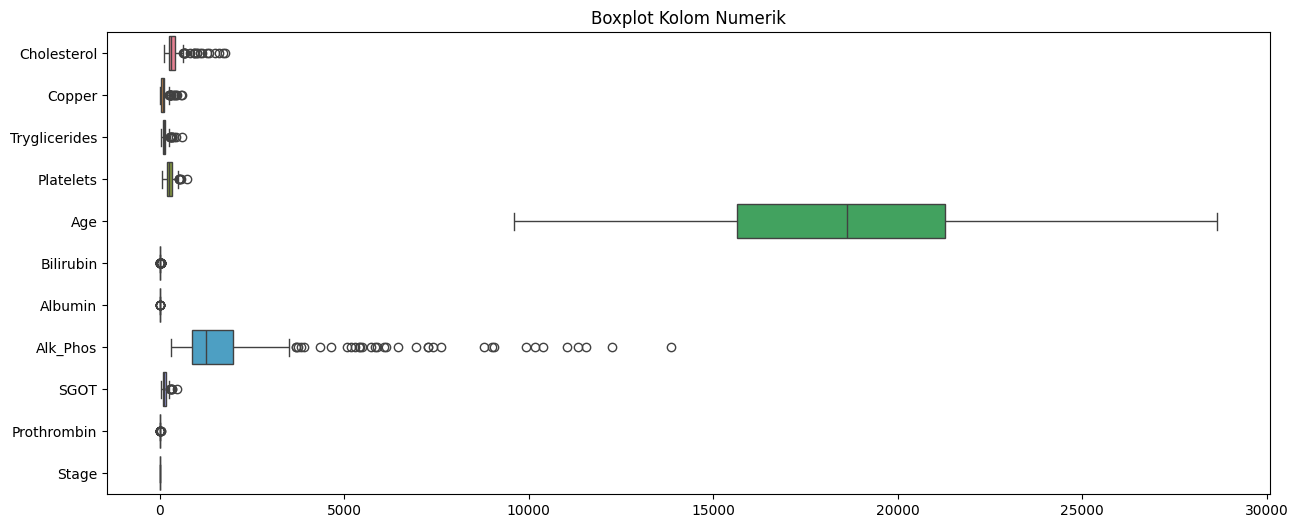

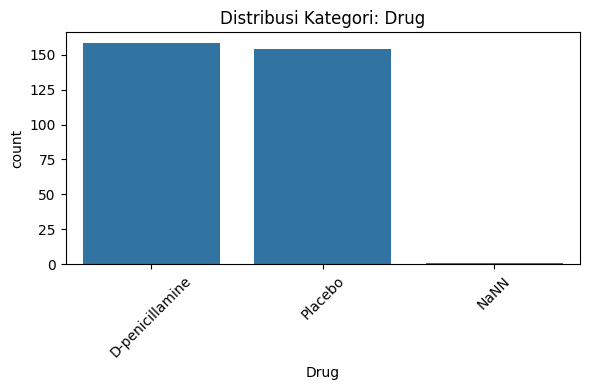

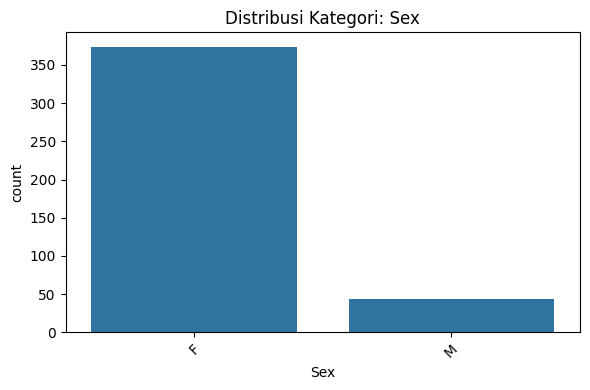

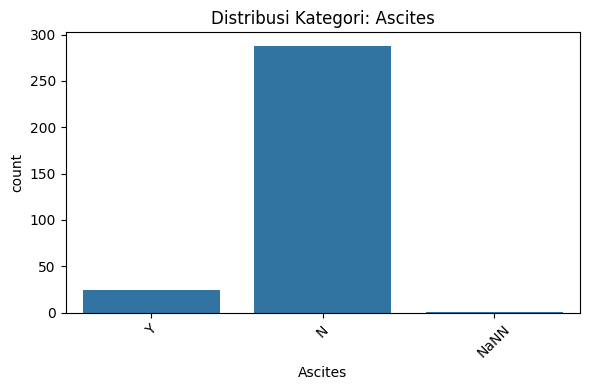

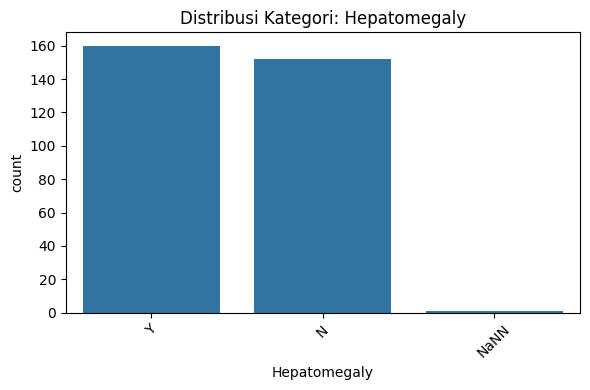

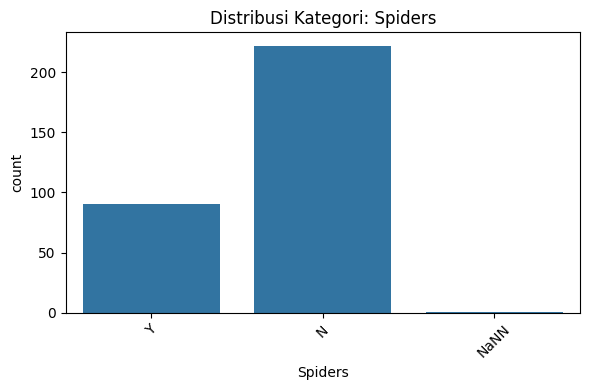

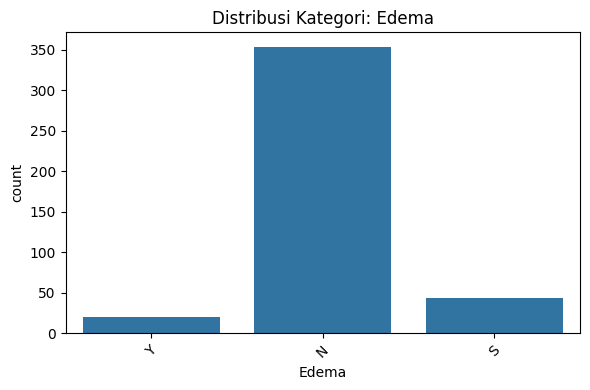

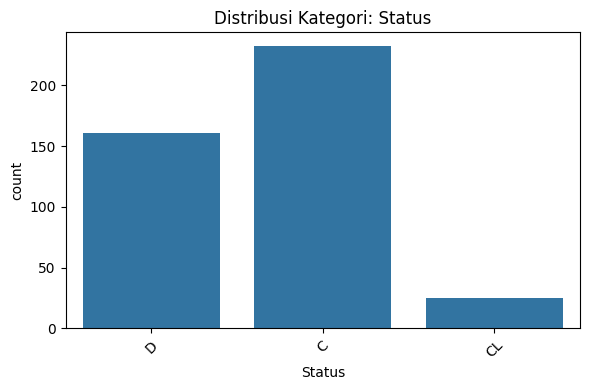

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Ambil dataset
data = fetch_ucirepo(id=878).data
df = pd.concat([data.features, data.targets], axis=1)

# Konversi kolom bertipe numerik yang salah
numeric_columns = ['Cholesterol', 'Copper', 'Tryglicerides', 'Platelets']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Tambahkan juga kolom numerik lainnya
numeric_columns += ['Age', 'Bilirubin', 'Albumin', 'Alk_Phos', 'SGOT', 'Prothrombin', 'Stage']

# --- VISUALISASI DATA NUMERIK ---

# Histogram untuk distribusi kolom numerik
df[numeric_columns].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histogram Kolom Numerik', fontsize=16)
plt.tight_layout()
plt.show()

# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numeric_columns], orient="h")
plt.title('Boxplot Kolom Numerik')
plt.show()

# --- VISUALISASI DATA KATEGORIKAL ---

categorical_columns = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status']

# Countplot masing-masing kolom kategorikal
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribusi Kategori: {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Preprocesing

## menghapus kolom mising value dan menghapus outliernya dengan KNN

In [29]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.neighbors import LocalOutlierFactor
from tabulate import tabulate

# 1. Load dataset
cirrhosis = fetch_ucirepo(id=878)
df = pd.concat([cirrhosis.data.features, cirrhosis.data.targets], axis=1)

# 2. Hapus kolom yang berisi missing value
df_cleaned = df.dropna(axis=1, how='any')

# 3. Pastikan 'id' ada (kalau tidak, buat ulang dari index)
if 'id' not in df_cleaned.columns:
    df_cleaned = df_cleaned.reset_index().rename(columns={'index':'id'})

# 4. Pilih kolom numerik untuk LOF, TANPA 'id'
numeric_cols = [
    c for c in df_cleaned.select_dtypes(include=['int64','float64']).columns
    if c != 'id'
]

# 5. Deteksi outlier dengan LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
flags = lof.fit_predict(df_cleaned[numeric_cols])
mask_inliers = flags == 1
df_no_outliers = df_cleaned[mask_inliers].reset_index(drop=True)

# 6. Hitung berapa baris yang terbuang
removed = len(df_cleaned) - len(df_no_outliers)
print(f"Jumlah baris sebelum : {len(df_cleaned)}")
print(f"Jumlah baris setelah  : {len(df_no_outliers)}")
print(f"Jumlah baris terbuang: {removed}\n")

# 7. Reorder kolom: 'id' di paling depan
cols = ['id'] + [c for c in df_no_outliers.columns if c != 'id']
df_no_outliers = df_no_outliers[cols]

# 8. Ambil 5 data awal & akhir, gabungkan, dan tampilkan
top_5    = df_no_outliers.head()
bottom_5 = df_no_outliers.tail()
combined = pd.concat([top_5, bottom_5])

print(tabulate(combined, headers='keys', tablefmt='grid', showindex=False))


Jumlah baris sebelum : 418
Jumlah baris setelah  : 397
Jumlah baris terbuang: 21

+------+-------+-------+---------+-------------+-----------+----------+
|   id |   Age | Sex   | Edema   |   Bilirubin |   Albumin | Status   |
+======+=======+=======+=========+=============+===========+==========+
|    0 | 21464 | F     | Y       |        14.5 |      2.6  | D        |
+------+-------+-------+---------+-------------+-----------+----------+
|    1 | 20617 | F     | N       |         1.1 |      4.14 | C        |
+------+-------+-------+---------+-------------+-----------+----------+
|    2 | 25594 | M     | S       |         1.4 |      3.48 | D        |
+------+-------+-------+---------+-------------+-----------+----------+
|    3 | 19994 | F     | S       |         1.8 |      2.54 | D        |
+------+-------+-------+---------+-------------+-----------+----------+
|    4 | 13918 | F     | N       |         3.4 |      3.53 | CL       |
+------+-------+-------+---------+-------------+------

# Pemodelan

## Klasifikasi status dengan Naive Bayes dengan mengganti kolom kategorical menjadi numerik

In [36]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.neighbors import LocalOutlierFactor
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate

# Load & preprocess awal
cirrhosis = fetch_ucirepo(id=878)
df = pd.concat([cirrhosis.data.features, cirrhosis.data.targets], axis=1)
df = df.dropna(axis=1, how='any')
if 'id' not in df.columns:
    df = df.reset_index().rename(columns={'index':'id'})

# Buang outlier via LOF
num_cols = [c for c in df.select_dtypes(include=['int64','float64']).columns if c!='id']
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
inlier_mask = lof.fit_predict(df[num_cols]) == 1
df_inliers = df[inlier_mask].reset_index(drop=True)

# Filter hanya status C/D
df_bin = df_inliers[df_inliers['Status'].isin(['C','D'])].reset_index(drop=True)

# Encode 'Sex' agar menjadi numerik dan fitur bisa di bandingkan
le = LabelEncoder()
df_bin['Sex_enc'] = le.fit_transform(df_bin['Sex'])  # e.g. F→0, M→1

# Siapkan fitur: tambahkan 'Sex_enc'
features = ['Age','Bilirubin','Albumin','Sex_enc']
X = df_bin[features].values
y = df_bin['Status'].values

# Latih GaussianNB
gnb = GaussianNB()
gnb.fit(X, y)

# Probabilitas posterior & prediksi
proba = gnb.predict_proba(X)
classes = gnb.classes_.tolist()  # ['C','D']
p_c = proba[:, classes.index('C')]
p_d = proba[:, classes.index('D')]
y_pred = gnb.predict(X)

# Siapkan tabel hasil
results = pd.DataFrame({
    'id':               df_bin['id'],
    'Age':              df_bin['Age'],
    'Sex':          df_bin['Sex_enc'],   # juga yang sudah di‑encode
    'Bilirubin':        df_bin['Bilirubin'],
    'Albumin':          df_bin['Albumin'],
    'Status':           df_bin['Status'],
    'P(C|X)':           p_c,
    'P(D|X)':           p_d,
    'final_prediction': y_pred
})

# Cetak tabel grid
print(tabulate(results, headers='keys', tablefmt='grid', showindex=False, floatfmt=".6g"))


+------+-------+-------+-------------+-----------+----------+-------------+-----------+--------------------+
|   id |   Age |   Sex |   Bilirubin |   Albumin | Status   |      P(C|X) |    P(D|X) | final_prediction   |
+======+=======+=======+=============+===========+==========+=============+===========+====================+
|    0 | 21464 |     0 |        14.5 |      2.6  | D        | 3.09606e-11 | 1         | D                  |
+------+-------+-------+-------------+-----------+----------+-------------+-----------+--------------------+
|    1 | 20617 |     0 |         1.1 |      4.14 | C        | 0.917172    | 0.0828275 | C                  |
+------+-------+-------+-------------+-----------+----------+-------------+-----------+--------------------+
|    2 | 25594 |     1 |         1.4 |      3.48 | D        | 0.179884    | 0.820116  | D                  |
+------+-------+-------+-------------+-----------+----------+-------------+-----------+--------------------+
|    3 | 19994 |   

## Hasil perhitungan akurasi dari klasifikasi Naive bayes

In [38]:
from sklearn.metrics import accuracy_score

# Hitung akurasi dan tampilkan
accuracy = accuracy_score(y, y_pred) * 100
print(f"Akurasi model Naive Bayes: {accuracy:.2f}%")


Akurasi model Naive Bayes: 72.85%


## Klasifikasi status dengan KNN dengan mengganti kolom kategorical menjadi numerik

In [40]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from tabulate import tabulate

# 1. Load & preprocess awal
cirrhosis = fetch_ucirepo(id=878)
df = pd.concat([cirrhosis.data.features, cirrhosis.data.targets], axis=1)

# 2. Drop kolom yang masih ada missing value
df = df.dropna(axis=1, how='any')

# 3. Pastikan ada kolom 'id'
if 'id' not in df.columns:
    df = df.reset_index().rename(columns={'index':'id'})

# 4. Buang outlier via LOF
num_cols = [c for c in df.select_dtypes(include=['int64','float64']).columns if c != 'id']
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
inlier_mask = lof.fit_predict(df[num_cols]) == 1
df_inliers = df[inlier_mask].reset_index(drop=True)

# 5. Filter hanya status C dan D
df_bin = df_inliers[df_inliers['Status'].isin(['C','D'])].reset_index(drop=True)

# 6. Encode 'Sex' menjadi numerik
le = LabelEncoder()
df_bin['Sex_enc'] = le.fit_transform(df_bin['Sex'])  # F→0, M→1

# 7. Siapkan fitur & label
features = ['Age', 'Bilirubin', 'Albumin', 'Sex_enc']
X = df_bin[features].values
y = df_bin['Status'].values

# 8. Bangun pipeline KNN dengan standard scaler
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])
knn_pipe.fit(X, y)

# 9. Predict probabilities & kelas
proba = knn_pipe.predict_proba(X)
classes = knn_pipe.named_steps['knn'].classes_.tolist()  # ['C','D']
p_c = proba[:, classes.index('C')]
p_d = proba[:, classes.index('D')]
y_pred = knn_pipe.predict(X)

# 10. Siapkan DataFrame hasil
results = pd.DataFrame({
    'id':               df_bin['id'],
    'Age':              df_bin['Age'],
    'Sex':              df_bin['Sex'],
    'Bilirubin':        df_bin['Bilirubin'],
    'Albumin':          df_bin['Albumin'],
    'Status':           df_bin['Status'],
    'P(C|X)':           p_c,
    'P(D|X)':           p_d,
    'final_prediction': y_pred
})

# 11. Cetak tabel grid
print(tabulate(results, headers='keys', tablefmt='grid', showindex=False, floatfmt=".6g"))


+------+-------+-------+-------------+-----------+----------+----------+----------+--------------------+
|   id |   Age | Sex   |   Bilirubin |   Albumin | Status   |   P(C|X) |   P(D|X) | final_prediction   |
+======+=======+=======+=============+===========+==========+==========+==========+====================+
|    0 | 21464 | F     |        14.5 |      2.6  | D        |      0   |      1   | D                  |
+------+-------+-------+-------------+-----------+----------+----------+----------+--------------------+
|    1 | 20617 | F     |         1.1 |      4.14 | C        |      1   |      0   | C                  |
+------+-------+-------+-------------+-----------+----------+----------+----------+--------------------+
|    2 | 25594 | M     |         1.4 |      3.48 | D        |      0.6 |      0.4 | C                  |
+------+-------+-------+-------------+-----------+----------+----------+----------+--------------------+
|    3 | 19994 | F     |         1.8 |      2.54 | D   

## Hasil perhitungan akurasi dari klasifikasi Naive bayes

In [41]:
from sklearn.metrics import accuracy_score

# Hitung akurasi
accuracy = accuracy_score(y, y_pred)
print(f"\nAkurasi model KNN: {accuracy * 100:.2f}%")



Akurasi model KNN: 79.03%


# Evaluasi

Pada data passien yang menderita sirosis hati terdapat status keberlangsungan hidup dengan adanya fitur fitur yang saling berkaitan pada status pasien tetapi banyak mising valuenya pada beberapa kolom yang membuat hanya tersisa beberapa kolom yang sudah di tampilkan pada saat klasifikasi dimana dari data bersih tersebut yang sudah di hapus outliernya dan sudah menghilangkan data yang memiliki mising value dan kami mencoba menggunakan naive bayes untuk melakukan klasifikasi tatapi menghasilkan akurasi yang cukup kecil karena naive bayes digunakan ketika setiap fitur tidak saling berkaitan berbanding terbalik pada data yang disajikan diatas yang setiap fiturnya saling berkaitan kami mencoba menggunakan knn untuk klasifikasi dan akurasi modelnya meningkat